这个实验拟合的函数为$$y = x_1^2 + 2*x_2^2 + 3*x_3$$  
* 所有setting与non-linear hard相似，但是这里的结果L0相对不加惩罚和L1都更有效，可以参照下面的结果。在样本量小于feature书的时候，无法收敛到较好的网络，训练多个epoch会导致严重过拟合。L1此时有一定防止过拟合的效果，收敛慢，此处的loss 15是调strength后可以达到的近似最优。L0比L1收敛快（epoch有200次但是W迭代更新次数少于L1），效果略好，loss为11.8。

In [1]:
cd ~/keras

/home/zhengfeng/keras


In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
from keras import regularizers
import matplotlib.pylab as plt

Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


In [3]:
%matplotlib inline

In [4]:
#[(200,500,300),(50,12,500),(50,500,500),(50,1000,1000),(100,12,500),(100,500,1000),(100,1000,1000)]
#10000,100,500 
n = 100
p = 500
problem = 'NLeasy'

In [5]:
X = np.load("/home/zhengfeng/simulationData/"+problem+"_X_"+str(n)+"_"+str(p)+".npy")
y = np.load("/home/zhengfeng/simulationData/"+problem+"_Y_"+str(n)+"_"+str(p)+".npy")
ValidationX = np.load("/home/zhengfeng/simulationData/"+problem+"_VX_"+str(n)+"_"+str(p)+".npy")
Validationy = np.load("/home/zhengfeng/simulationData/"+problem+"_VY_"+str(n)+"_"+str(p)+".npy")

In [6]:
model = Sequential()
layer1 = Dense(256, activation="relu", init="normal", input_dim=p)
layer2 = Dense(1, activation="linear", init="normal", input_dim=16)
# layer3 = Dense(1, activation="linear", init="normal", input_dim=16)
# layer4 = Dense(1, activation="linear", init="normal", input_dim=16)
model.add(layer1)
model.add(layer2)
# model.add(layer3)
# model.add(layer4)
# model.add(Dense(16, input_dim=32,init='normal',activation='sigmoid'))
# model.add(Dense(1, init='normal',activation='linear'))

model.compile(loss='mean_squared_error', optimizer=optimizers.Adam())
# model.compile(loss='mean_squared_error', optimizer=optimizers.SGDModifiedOnLayer(layers=[0],tau=0.1, alpha=0.2,lr =0.01))

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, kernel_initializer="normal", activation="relu", input_dim=500)`
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal", activation="linear", input_dim=16)`
  app.launch_new_instance()


In [7]:
#pre-train
model.fit(X, y, validation_data=(ValidationX,Validationy),batch_size=10, nb_epoch=50)
model.save_weights("/home/zhengfeng/exp/weights.h5")
w = layer1.get_weights()
np.savetxt('/home/zhengfeng/exp/WPretrain.txt',w[0].T)

keras/models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 100 samples, validate on 1000 samples
Epoch 1/50
100/100 [==============================] - 1s - loss: 27.5615 - val_loss: 24.4205
Epoch 2/50
100/100 [==============================] - 0s - loss: 14.1799 - val_loss: 22.3606
Epoch 3/50
100/100 [==============================] - 0s - loss: 7.0975 - val_loss: 21.6262
Epoch 4/50
100/100 [==============================] - 0s - loss: 2.8545 - val_loss: 21.5082
Epoch 5/50
100/100 [==============================] - 0s - loss: 0.8469 - val_loss: 21.6936
Epoch 6/50
100/100 [==============================] - 0s - loss: 0.2308 - val_loss: 21.8528
Epoch 7/50
100/100 [==============================] - 0s - loss: 0.0991 - val_loss: 21.8630
Epoch 8/50
100/100 [==============================] - 0s - loss: 0.0329 - val_loss: 21.7978
Epoch 9/50
100/100 [==============================] - 0s - loss: 0.0101 - val_loss: 21.7572
Epoch 10/50
100/100 [==============================] - 0s - loss: 0.0058 - val_loss: 21.7680
Epoch 11/50
100/100 [=========

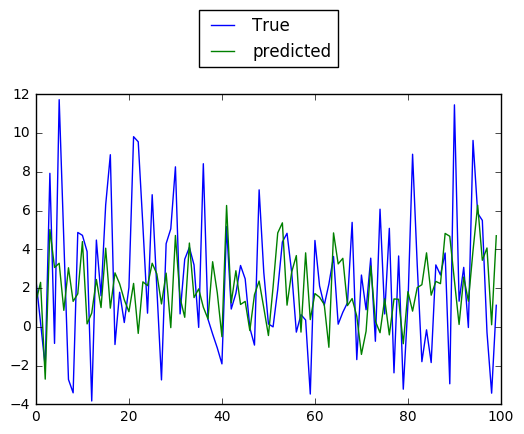

In [8]:
predictY = model.predict(ValidationX)
plt.plot(Validationy[:100], label = 'True')
plt.plot(predictY[:100], label = "predicted")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3))
plt.show()

In [9]:
w_count = np.full_like(w[0].T[0],0)
w_sum = np.full_like(w[0].T[0],0.0)
for i in range(w[0].T.shape[0]):
    w_sum += abs(w[0].T[i])
    w_count += (abs(w[0].T[i])>0)*1

In [10]:
w[0].T[0]

array([  7.29649514e-02,  -1.05192577e-02,   6.20588008e-03,
        -2.40070987e-02,  -5.32406345e-02,   6.73309043e-02,
        -2.00942159e-02,   3.99941206e-02,   8.21697786e-02,
         6.24627471e-02,  -9.66041908e-03,   1.52871627e-02,
        -5.68078719e-02,  -2.71404721e-02,  -4.56711370e-03,
         3.72485109e-02,   7.62643805e-03,   1.88490618e-02,
         5.68470657e-02,  -2.54563894e-02,  -3.29234004e-02,
        -7.62905180e-02,  -3.99800353e-02,  -3.65853421e-02,
        -2.17432156e-02,  -8.22038651e-02,   8.28834027e-02,
        -1.36163039e-02,   2.34746914e-02,   1.00090429e-02,
         8.29816516e-03,  -5.16390167e-02,  -2.47297194e-02,
         1.30946822e-02,   2.65085939e-02,   3.94945778e-02,
         5.05348705e-02,  -2.62978226e-02,   5.06018922e-02,
        -2.71727294e-02,   3.29134203e-02,   4.43419963e-02,
         5.13280146e-02,   7.00150896e-03,  -1.20723723e-02,
         6.14438057e-02,   1.64027400e-02,   2.31249128e-02,
        -3.70207569e-03,

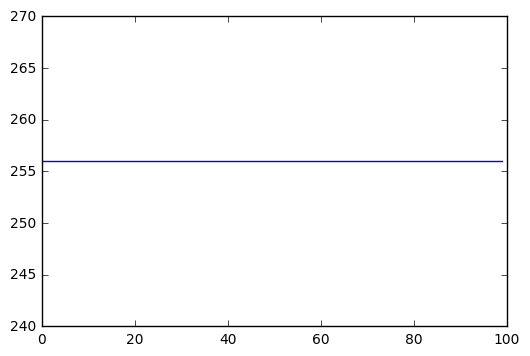

In [11]:
plt.plot(w_count[:100])

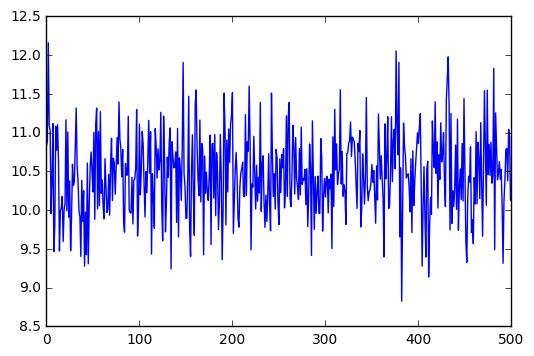

In [12]:
plt.plot(w_sum)

In [17]:
#L1 
loaded_model_l1 = Sequential()
layer1 = Dense(256, activation="relu", init="normal", input_dim=p, W_regularizer=regularizers.l1(0.05))
# layer1 = Dense(16, activation="relu", init="normal", input_dim=p, kernel_regularizer=regularizers.l1(0.05))#activity_regularizer=regularizers.l1(0.1)
layer2 = Dense(1, activation="linear", init="normal", input_dim=256)
# layer3 = Dense(1, activation="linear", init="normal", input_dim=16)

loaded_model_l1.add(layer1)
loaded_model_l1.add(layer2)
# loaded_model_l1.add(layer3)

loaded_model_l1.load_weights("/home/zhengfeng/exp/weights.h5")
loaded_model_l1.compile(loss='mean_squared_error', optimizer=optimizers.Adam())
loaded_model_l1.fit(X, y, validation_data=(ValidationX,Validationy), batch_size=15, nb_epoch=200)
score2 = loaded_model_l1.evaluate(ValidationX, Validationy, batch_size=128)
w = layer1.get_weights()
np.savetxt('/home/zhengfeng/exp/WL1.txt',w[0].T)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, kernel_initializer="normal", activation="relu", kernel_regularizer=<keras.reg..., input_dim=500)`
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal", activation="linear", input_dim=256)`


Train on 100 samples, validate on 1000 samples
Epoch 1/200
100/100 [==============================] - 0s - loss: 246.4796 - val_loss: 245.0475
Epoch 2/200
100/100 [==============================] - 0s - loss: 208.1390 - val_loss: 208.1398
Epoch 3/200
100/100 [==============================] - 0s - loss: 173.3075 - val_loss: 175.7715
Epoch 4/200
100/100 [==============================] - 0s - loss: 143.1871 - val_loss: 148.0142
Epoch 5/200
100/100 [==============================] - 0s - loss: 117.6046 - val_loss: 124.5919
Epoch 6/200
100/100 [==============================] - 0s - loss: 96.2444 - val_loss: 105.0814
Epoch 7/200
100/100 [==============================] - 0s - loss: 78.6129 - val_loss: 89.1420
Epoch 8/200
100/100 [==============================] - 0s - loss: 64.2120 - val_loss: 75.9594
Epoch 9/200
100/100 [==============================] - 0s - loss: 52.5442 - val_loss: 65.4701
Epoch 10/200
100/100 [==============================] - 0s - loss: 43.2258 - val_loss: 56.4980
E

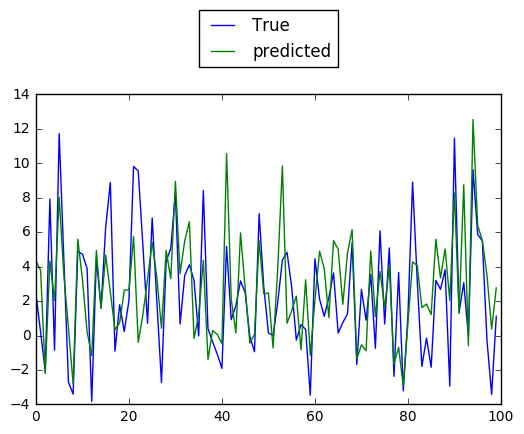

In [18]:
predictY = loaded_model_l1.predict(ValidationX)
plt.plot(Validationy[:100], label = 'True')
plt.plot(predictY[:100], label = "predicted")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3))
plt.show()

In [19]:
weight_L1 = np.loadtxt('/home/zhengfeng/exp/WL1.txt')
w_count = np.full_like(weight_L1[0],0)
w_sum = np.full_like(weight_L1[0],0.0)
for i in range(weight_L1.shape[0]):
    w_sum += abs(weight_L1[i])
    w_count += (abs(weight_L1[i])>0)*1

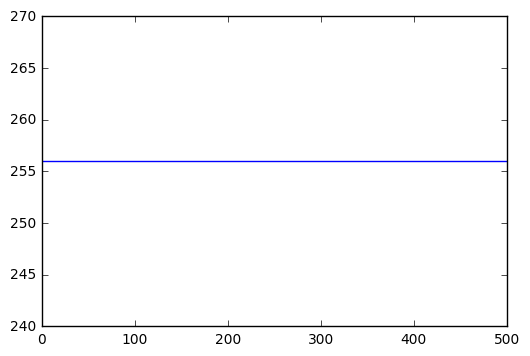

In [20]:
plt.plot(w_count)

<Container object of 50 artists>

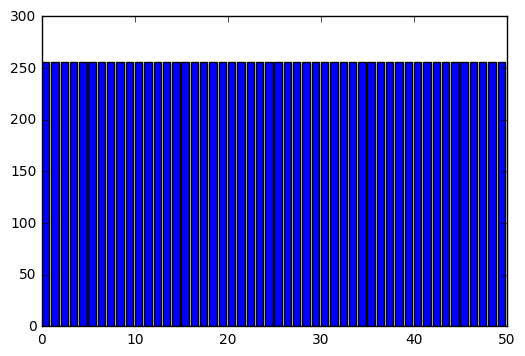

In [21]:
plt.bar(range(50),w_count[:50])

<Container object of 100 artists>

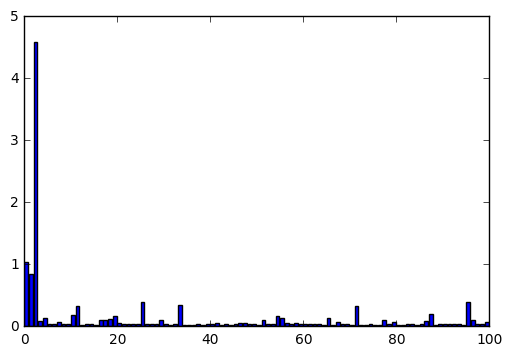

In [22]:
plt.bar(range(100),w_sum[:100])

In [28]:
#l0training

loaded_model = Sequential()
# layer1 = Dense(16, activation="relu", init="normal", input_dim=p, W_regularizer=regularizers.l1(0.5))
layer1 = Dense(256, activation="relu", init="normal", input_dim=p)
layer2 = Dense(1, activation="linear", init="normal", input_dim=256)
# layer3 = Dense(1, activation="linear", init="normal", input_dim=16)
# layer4 = Dense(1, activation="linear", init="normal", input_dim=16)
# layer3 = Dense(1, activation="linear", init="normal", input_dim=16)

loaded_model.add(layer1)
loaded_model.add(layer2)
# loaded_model.add(layer3)
# loaded_model.add(layer4)
loaded_model.load_weights("/home/zhengfeng/exp/weights.h5")
# loaded_model.compile(loss='mean_squared_error', optimizer=optimizers.AdamModified(tau=0.2, alpha=0.2, lr = 0.1))
# loaded_model.compile(loss='mean_squared_error', optimizer=optimizers.SGDModified(tau=0.2, alpha=0.1,lr =0.05))
loaded_model.compile(loss='mean_squared_error', optimizer=optimizers.SGDModifiedOnLayer(layers=[0],tau=0.1, alpha=1.2,lr =0.005))
# loaded_model.compile(loss='mean_squared_error', optimizer=optimizers.Adam())
loaded_model.fit(X, y, validation_data=(ValidationX,Validationy), batch_size=100, nb_epoch=200)
score2 = loaded_model.evaluate(ValidationX, Validationy, batch_size=128)
w = layer1.get_weights()
np.savetxt('/home/zhengfeng/exp/WL0.txt',w[0].T)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, kernel_initializer="normal", activation="relu", input_dim=500)`
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="normal", activation="linear", input_dim=256)`


Train on 100 samples, validate on 1000 samples
Epoch 1/200
100/100 [==============================] - 0s - loss: 5.8234e-14 - val_loss: 21.8955
Epoch 2/200
100/100 [==============================] - 0s - loss: 0.2651 - val_loss: 21.7342
Epoch 3/200
100/100 [==============================] - 0s - loss: 0.6327 - val_loss: 21.5915
Epoch 4/200
100/100 [==============================] - 0s - loss: 1.1320 - val_loss: 21.4908
Epoch 5/200
100/100 [==============================] - 0s - loss: 1.7750 - val_loss: 21.4437
Epoch 6/200
100/100 [==============================] - 0s - loss: 2.5795 - val_loss: 21.4648
Epoch 7/200
100/100 [==============================] - 0s - loss: 3.5644 - val_loss: 21.5538
Epoch 8/200
100/100 [==============================] - 0s - loss: 4.7351 - val_loss: 21.6888
Epoch 9/200
100/100 [==============================] - 0s - loss: 6.0946 - val_loss: 21.8540
Epoch 10/200
100/100 [==============================] - 0s - loss: 7.6076 - val_loss: 22.0529
Epoch 11/200
100/1

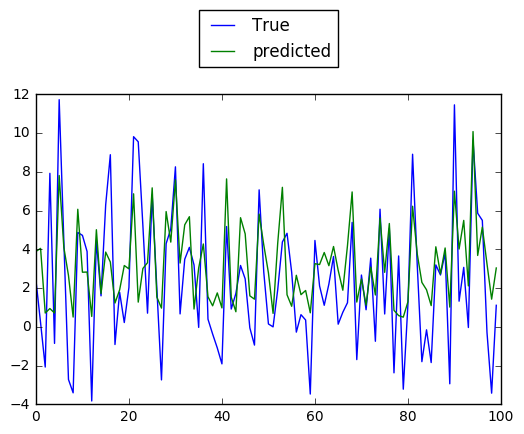

In [29]:
predictY = loaded_model.predict(ValidationX)
plt.plot(Validationy[:100], label = 'True')
plt.plot(predictY[:100], label = "predicted")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3))
plt.show()

In [30]:
weight_L0 = np.loadtxt('/home/zhengfeng/exp/WL0.txt')

In [31]:
w_count = np.full_like(weight_L0[0],0)
w_sum = np.full_like(weight_L0[0],0.0)
for i in range(weight_L0.shape[0]):
    w_sum += abs(weight_L0[i])
    w_count += (abs(weight_L0[i])>0)*1

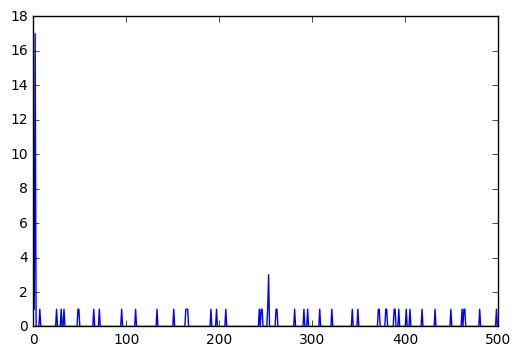

In [32]:
plt.plot(w_count)

<Container object of 50 artists>

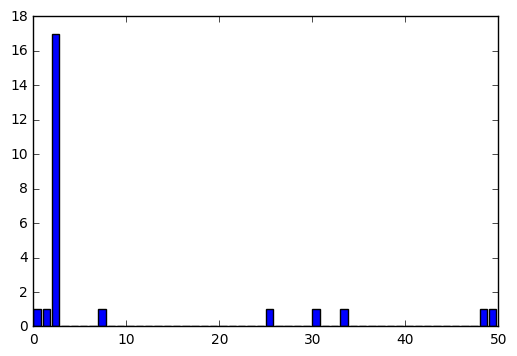

In [33]:
plt.bar(range(50),w_count[:50])

<Container object of 100 artists>

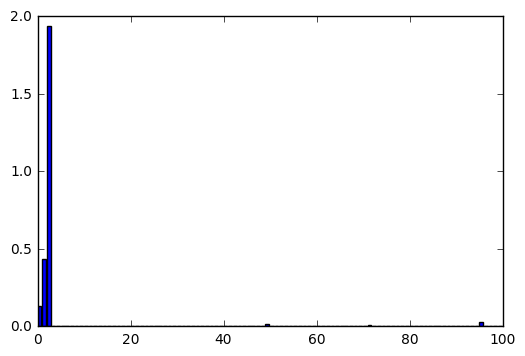

In [34]:
plt.bar(range(100),w_sum[:100])